In [2]:
INPUT_DIR = '/kaggle/input/anime-recommendation-database-2020'
!ls {INPUT_DIR}

 anime.csv		   animelist.csv   rating_complete.csv
 anime_with_synopsis.csv  'html folder'    watching_status.csv


In [3]:
import numpy as np
import pandas as pd

rating_df = pd.read_csv(INPUT_DIR + '/animelist.csv', 
                        low_memory=False, 
                        usecols=["user_id", "anime_id", "rating"]
                        #, nrows=30000000
                        )
rating_df.head(4)

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0


In [4]:
# Rate atleast 400 animies
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
len(rating_df)

71418114

In [5]:
# Scaling (0 , 1.0)
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df['rating'].apply(lambda x: (x - min_rating)/(max_rating - min_rating)).values.astype(np.float64)

avgRating = np.mean(rating_df['rating'])
print('Average: ',avgRating)

Average:  0.40477935891013467


In [6]:
# Removing Duplicated Rows
duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]
    
print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 1 duplicates
> 0 duplicates


In [7]:
g_user = rating_df.groupby('user_id')['rating'].count()
top_users = g_user.dropna().sort_values(ascending=False)[:20]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g_anime = rating_df.groupby('anime_id')['rating'].count()
top_animes = g_anime.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)

anime_id,226,1535,1575,2001,2167,4224,5081,5114,6547,6746,9253,9989,10620,11757,15809,16498,19815,20507,22319,30276
user_id,,,,,,,,,,,,,,,,,,,,
20807,1.0,1.0,1.0,1.0,0.8,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0
50485,0.0,0.6,1.0,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,0.9,0.6,1.0,1.0,0.9,1.0,1.0,1.0,0.8
63900,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0,0.8,0.8,0.8
68042,0.8,1.0,0.9,1.0,0.7,0.9,1.0,0.9,0.7,0.8,0.9,0.8,0.4,0.4,0.6,0.9,0.3,0.2,0.5,0.9
85472,0.7,0.0,0.0,1.0,0.9,0.9,0.0,0.0,1.0,0.0,0.8,0.0,0.8,0.9,0.8,0.8,0.7,0.7,0.7,0.9
92529,0.9,0.9,1.0,1.0,0.0,0.8,0.0,0.9,0.9,0.0,1.0,0.0,0.8,0.9,0.8,0.9,0.9,0.8,0.8,1.0
122341,0.2,0.3,0.2,0.7,0.4,0.3,0.3,0.8,0.5,0.6,0.7,0.3,0.2,0.1,0.3,0.1,0.4,0.4,0.2,0.6
131988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140590,0.3,0.6,0.5,0.8,0.6,0.8,0.8,0.9,0.5,0.8,0.9,0.7,0.3,0.4,0.6,0.5,0.7,0.7,0.5,0.7


## **Data Preprocessing**

In [9]:
#Encoding categorical data
user_ids = rating_df['user_id'].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df['user'] = rating_df['user_id'].map(user2user_encoded)
n_users = len(user2user_encoded)

anime_ids = rating_df['anime_id'].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df['anime'] = rating_df['anime_id'].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print('Num of users: {},Num of animes: {}'.format(n_users,n_animes))
print('Min rating: {}, Max rating: {}'.format(min(rating_df['rating']),max(rating_df['rating'])))

Num of users: 91641,Num of animes: 17560
Min rating: 0.0, Max rating: 1.0


In [12]:
# Split
from sklearn.model_selection import train_test_split
X = rating_df[['user', 'anime']].values
y = rating_df['rating']
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=10000,random_state=74)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size= 0.05, random_state=74)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Validation set ratings: {}'.format(len(y_val)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 67837707
> Validation set ratings: 3570406
> Test set ratings: 10000


In [13]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_val_array = [X_val[:, 0], X_val[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [14]:
# Accelerator check
import tensorflow as tf

TPU_INIT = True

if TPU_INIT:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    !nvidia-smi
    
print(tf.__version__)

2023-02-02 18:48:17.794275: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2023-02-02 18:48:17.795560: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-02 18:48:24.906378: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-02 18:48:24.910600: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2023-02-02 18:48:24.910683: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-02 18:48:24.910707: I tensorflow/stream_executor/cuda/cud

2.4.1


## **Model Building**

In [15]:
import tensorflow.keras
from tensorflow.keras import layers 
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [16]:
# Embedding layers
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten


def RecommenderNet():
    embedding_size = 128
    
    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users, 
                       output_dim = embedding_size)(user)
    
    anime = Input(name = 'anime', shape = [1])
    anime_embedding = Embedding(name = 'anime_embedding',
                       input_dim = n_animes, 
                       output_dim = embedding_size)(anime)
    
    x = Concatenate()([user_embedding, anime_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)
    

    x = Dense(1,kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('sigmoid')(x)
    
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=['mse','mae'], optimizer='Adam')
    
    return model

if TPU_INIT:    
    with tpu_strategy.scope():
        model = RecommenderNet()
else:
    model = RecommenderNet()

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
anime (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 128)       11730048    user[0][0]                       
__________________________________________________________________________________________________
anime_embedding (Embedding)     (None, 1, 128)       2247680     anime[0][0]                      
______________________________________________________________________________________________

In [17]:
#Callbacks
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync
rampup_epochs = 5
sustain_epochs = 0
exp_decay = 0.8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr

    
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch),verbose=0)

checkpoint_filepath = './weights.h5'
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                   save_weights_only=True,
                                   monitor='val_loss',
                                   mode='min',
                                   save_best_only=True)
early_stopping = EarlyStopping(patience=3, monitor='val_loss',
                              mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,
]

In [18]:
#Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_val_array, y_val),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

2023-02-02 18:48:42.393209: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 542701656 exceeds 10% of free system memory.
2023-02-02 18:48:43.221519: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 542701656 exceeds 10% of free system memory.
2023-02-02 18:48:44.647903: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 542701656 exceeds 10% of free system memory.


Epoch 1/20
848/848 [==============================] - 37s 31ms/step - loss: 0.7874 - mse: 0.1949 - mae: 0.3820 - val_loss: 0.7823 - val_mse: 0.1933 - val_mae: 0.3814
Epoch 2/20
848/848 [==============================] - 21s 25ms/step - loss: 0.7760 - mse: 0.1905 - mae: 0.3787 - val_loss: 0.7150 - val_mse: 0.1649 - val_mae: 0.3515
Epoch 3/20
848/848 [==============================] - 22s 25ms/step - loss: 0.6377 - mse: 0.1309 - mae: 0.3084 - val_loss: 0.5741 - val_mse: 0.1034 - val_mae: 0.2686
Epoch 4/20
848/848 [==============================] - 22s 25ms/step - loss: 0.5570 - mse: 0.0957 - mae: 0.2588 - val_loss: 0.5409 - val_mse: 0.0896 - val_mae: 0.2471
Epoch 5/20
848/848 [==============================] - 21s 25ms/step - loss: 0.5254 - mse: 0.0831 - mae: 0.2363 - val_loss: 0.5153 - val_mse: 0.0801 - val_mae: 0.2263
Epoch 6/20
848/848 [==============================] - 21s 25ms/step - loss: 0.4985 - mse: 0.0732 - mae: 0.2142 - val_loss: 0.4987 - val_mse: 0.0746 - val_mae: 0.2097
Epoc

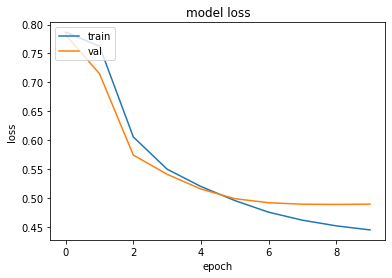

In [19]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [20]:
result = model.evaluate(X_test_array,y_test, verbose=0)
print('Loss: {:.4f}'.format(result[0]))
print('MSE: {:.4f}'.format(result[1]))
print('MAE: {:.4f}'.format(result[2]))

Loss: 0.4878
MSE: 0.0709
MAE: 0.1913


## **Extracting weights from model**

In [21]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights,axis=1).reshape((-1,1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)

## Fixing names

In [22]:
df = pd.read_csv(INPUT_DIR + '/anime.csv',low_memory=True)
df = df.replace('Unknown',np.nan)

In [23]:
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print('error')
        
    return name

df['anime_id'] = df['MAL_ID']
df['eng_version'] = df['English name']
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

df.sort_values(by=['Score'],
              inplace=True,
              ascending=False,
              kind='quicksort',
              na_position='last')

df = df[['anime_id','eng_version',
        'Score','Genres','Episodes',
        'Type','Premiered','Members']]

In [24]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    else:
        return df[df.eng_version == anime]

In [25]:
cols = ['MAL_ID','Name','Genres','sypnopsis']
synopsis_df = pd.read_csv(INPUT_DIR + '/anime_with_synopsis.csv', usecols=cols)

def getSynopsis(anime):
    if isinstance(anime, int):
        return synopsis_df[synopsis_df.MAL_ID == anime].sypnopsis.values[0]
    else:
        return synopsis_df[synopsis_df.Name == anime].sypnopsis.values[0]

## **Finding similar animes**

In [26]:
pd.set_option('max_colwidth', None)

def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        
        print('animes closest to {}'.format(name))
        if return_dist:
            return dists, closest
        
        rindex = df

        SimilarityArr = []
        
        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = getSynopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)
            
            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity,"genre": genre,
                                  'sypnopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print('{}!, Not Found in Anime list'.format(name))

In [27]:
find_similar_animes('Your Name.', n=5, neg=False)

animes closest to Your Name.


,name,similarity,genre,sypnopsis
4,A Silent Voice,0.941683,"Drama, School, Shounen","s a wild youth, elementary school student Shouya Ishida sought to beat boredom in the cruelest ways. When the deaf Shouko Nishimiya transfers into his class, Shouya and the rest of his class thoughtlessly bully her for fun. However, when her mother notifies the school, he is singled out and blamed for everything done to her. With Shouko transferring out of the school, Shouya is left at the mercy of his classmates. He is heartlessly ostracized all throughout elementary and middle school, while teachers turn a blind eye. Now in his third year of high school, Shouya is still plagued by his wrongdoings as a young boy. Sincerely regretting his past actions, he sets out on a journey of redemption: to meet Shouko once more and make amends. Koe no Katachi tells the heartwarming tale of Shouya's reunion with Shouko and his honest attempts to redeem himself, all while being continually haunted by the shadows of his past."
3,Your Lie in April,0.704199,"Drama, Music, Romance, School, Shounen","usic accompanies the path of the human metronome, the prodigious pianist Kousei Arima. But after the passing of his mother, Saki Arima, Kousei falls into a downward spiral, rendering him unable to hear the sound of his own piano. Two years later, Kousei still avoids the piano, leaving behind his admirers and rivals, and lives a colorless life alongside his friends Tsubaki Sawabe and Ryouta Watari. However, everything changes when he meets a beautiful violinist, Kaori Miyazono, who stirs up his world and sets him on a journey to face music again. Based on the manga series of the same name, Shigatsu wa Kimi no Uso approaches the story of Kousei's recovery as he discovers that music is more than playing each note perfectly, and a single melody can bring in the fresh spring air of April."
2,ERASED,0.682502,"Mystery, Psychological, Supernatural, Seinen","hen tragedy is about to strike, Satoru Fujinuma finds himself sent back several minutes before the accident occurs. The detached, 29-year-old manga artist has taken advantage of this powerful yet mysterious phenomenon, which he calls ""Revival,"" to save many lives. However, when he is wrongfully accused of murdering someone close to him, Satoru is sent back to the past once again, but this time to 1988, 18 years in the past. Soon, he realizes that the murder may be connected to the abduction and killing of one of his classmates, the solitary and mysterious Kayo Hinazuki, that took place when he was a child. This is his chance to make things right. Boku dake ga Inai Machi follows Satoru in his mission to uncover what truly transpired 18 years ago and prevent the death of his classmate while protecting those he cares about in the present."
1,Re:ZERO -Starting Life in Another World-,0.672543,"Psychological, Drama, Thriller, Fantasy","hen Subaru Natsuki leaves the convenience store, the last thing he expects is to be wrenched from his everyday life and dropped into a fantasy world. Things aren't looking good for the bewildered teenager; however, not long after his arrival, he is attacked by some thugs. Armed with only a bag of groceries and a now useless cell phone, he is quickly beaten to a pulp. Fortunately, a mysterious beauty named Satella, in hot pursuit after the one who stole her insignia, happens upon Subaru and saves him. In order to thank the honest and kindhearted girl, Subaru offers to help in her search, and later that night, he even finds the whereabouts of that which she seeks. But unbeknownst to them, a much darker force stalks the pair from the shadows, and just minutes after locating the insignia, Subaru and Satella are brutally murdered. However, Subaru immediately reawakens to a familiar scene—confronted by the same group of thugs, meeting Satella all over again—the enigma deepens as history inexplicably repeats itself."
0,Attack on Titan,0.660657,"Action, Military, Mystery, Super Power, Drama, Fantasy, 

## **Finding similar users**

In [28]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights
    
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest
        
        rindex = df
        SimilarityArr = []
        
        for close in closest:
            similarity = dists[close]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id, 
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", 
                                                        ascending=False)
        
        return Frame
    
    except:
        print('{}!, Not Found in User list'.format(name))

In [29]:
similar_users = find_similar_users(int(88895), 
                                   n=5, 
                                   neg=False)

similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != 88895]
similar_users.head(5)

> users similar to #88895


,similar_users,similarity
4,3333,0.514016
3,132077,0.508435
2,226062,0.504350
1,20198,0.498760
0,261510,0.492650


## **User preferences**

In [30]:

from collections import defaultdict
import matplotlib.pyplot as plt


def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = rating_df[rating_df.user_id==user_id]
    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)#.head(10)
        .anime_id.values
    )
    
    anime_df_rows = df[df["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["eng_version", "Genres"]]
    
    if verbose != 0:
        print("> User #{} has rated {} movies (avg. rating = {:.1f})".format(
          user_id, len(animes_watched_by_user),
          animes_watched_by_user['rating'].mean(),
        ))
    
        print('> preferred genres')
          
    return anime_df_rows#.eng_version.values

In [31]:
user_pref = get_user_preferences(88895, plot=True, verbose=1)
print('> animes highly rated by this user')

pd.DataFrame(user_pref).head(5)

> User #88895 has rated 230 movies (avg. rating = 1.0)
> preferred genres
> animes highly rated by this user


,eng_version,Genres
3971,Fullmetal Alchemist:Brotherhood,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen"
5683,Steins;Gate,"Thriller, Sci-Fi"
9886,A Silent Voice,"Drama, School, Shounen"
11308,Your Name.,"Romance, Supernatural, School, Drama"
3537,Clannad ~After Story~,"Slice of Life, Comedy, Supernatural, Drama, Romance"


## **Recommending animes for a user**

In [32]:
def get_recommended_animes(similar_users, n=10):
    recommended_animes = []
    anime_list = []
    
    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id), verbose=0)
        pref_list = pref_list[~ pref_list.eng_version.isin(user_pref.eng_version.values)]
        anime_list.append(pref_list.eng_version.values)
        
    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    
    for i, anime_name in enumerate(sorted_list.index):        
        n_user_pref = sorted_list[sorted_list.index == anime_name].values[0][0]
        if isinstance(anime_name, str):
            try:
                frame = getAnimeFrame(anime_name)
                anime_id = frame.anime_id.values[0]
                genre = frame.Genres.values[0]
                sypnopsis = getSynopsis(int(anime_id))
                recommended_animes.append({#"anime_id": anime_id ,
                                            "n": n_user_pref,
                                            "anime_name": anime_name, 
                                            "Genres": genre, 
                                            "sypnopsis": sypnopsis})
            except:
                pass
    
    return pd.DataFrame(recommended_animes)

In [33]:
recommended_animes = get_recommended_animes(similar_users, n=10)

print('\n> Top recommendations for user: {}'.format(88895))
recommended_animes


> Top recommendations for user: 88895


,n,anime_name,Genres,sypnopsis
0,8,Bakuman.,"Comedy, Drama, Romance, Shounen","Onto their third serialization, manga duo Moritaka Mashiro and Akito Takagi—also known by their pen name, Muto Ashirogi—are ever closer to their dream of an anime adaption. However, the real challenge is only just beginning: if they are unable to compete with the artist Eiji Niizuma in the rankings within the span of six months, they will be canceled. To top it off, numerous rivals are close behind and declaring war. They don't even have enough time to spare thinking about an anime! In Bakuman. 3rd Season , Muto Ashirogi must find a way to stay atop the colossal mountain known as the Shounen Jack rankings. With new problems and new assistants, the pair continue to strive for their dream."
1,5,Death Note,"Mystery, Police, Psychological, Supernatural, Thriller, Shounen","shinigami, as a god of death, can kill any person—provided they see their victim's face and write their victim's name in a notebook called a Death Note. One day, Ryuk, bored by the shinigami lifestyle and interested in seeing how a human would use a Death Note, drops one into the human realm. High school student and prodigy Light Yagami stumbles upon the Death Note and—since he deplores the state of the world—tests the deadly notebook by writing a criminal's name in it. When the criminal dies immediately following his experiment with the Death Note, Light is greatly surprised and quickly recognizes how devastating the power that has fallen into his hands could be. With this divine capability, Light decides to extinguish all criminals in order to build a new world where crime does not exist and people worship him as a god. Police, however, quickly discover that a serial killer is targeting criminals and, consequently, try to apprehend the culprit. To do this, the Japanese investigators count on the assistance of the best detective in the world: a young and eccentric man known only by the name of L."
2,5,The Disappearance of Haruhi Suzumiya,"Comedy, Mystery, Romance, School, Sci-Fi, Supernatural","One cold Christmas day, Kyon heads over to school and the SOS Brigade's holiday celebration, only to realize that Haruhi Suzumiya seems to have disappeared. Moreover, no one even remembers her or the SOS Brigade; Mikuru Asahina knows nothing and is now afraid of him, and Itsuki Koizumi has also gone missing. The Literature Club, formed only by an uncharacteristically shy Yuki Nagato, now occupies the old SOS club room. Suzumiya Haruhi no Shoushitsu is based on the fourth light novel of the acclaimed Haruhi series and is set after the events of the anime series. Not uncultured in the supernatural, Kyon will have to deal with his whole life turned upside down like a bad joke, and maybe it's better that way."
3,5,Berserk,"Action, Adventure, Demons, Drama, Fantasy, Horror, Military, Romance, Seinen, Supernatural","Born from the corpse of his mother, a young mercenary known only as Guts, embraces the battlefield as his only means of survival. Day in and day out, putting his life on the line just to make enough to get by, he moves from one bloodshed to the next. After a run-in with the Band of the Hawk, a formidable troop of mercenaries, Guts is recruited by their charismatic leader Griffith, nicknamed the ""White Hawk."" As he quickly climbed the ranks in order to become the head of the offensive faction, Guts proves to be a mighty addition to Griffith's force, taking Midland by storm. However, while the band's quest for recognition continues, Guts slowly realizes that the world is not as black-and-white as he once assumed. Set in the medieval era, Kenpuu Denki Berserk is a dark, gritty tale that follows one man's struggle to find his own path, while supporting another's lust for power, and the unimaginable tragedy that begins to turn the wheels of fate."
4,4,The Girl Who Leapt Through Time,"Adventure, Drama, Romance, Sci-Fi","akoto Konno is in her last year of high school, but is having a hard tim

In [34]:
model.save('anime_model.h5')

from IPython.display import FileLink
FileLink(r'./anime_model.h5')

/kaggle/working/anime_model.h5